In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Titanic-Dataset.csv')
df.set_index('PassengerId', inplace=True)  # Set PassengerId as index
df = df.drop(['Name','Ticket', 'Cabin', 'Embarked'], axis=1)  # Drop unnecessary columns
df['HasFamily'] = (df['SibSp'] > 0) | (df['Parch'] > 0)  # Create a new column to indicate if a passenger has family aboard
age_bins = [0, 17, 64, float('inf')]  # Define age bins
age_labels = ['child', 'adult', 'senior']  # Define age labels
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=True, include_lowest=True)  # Create AgeGroup column
df.head()  # Display the first few rows of the DataFrame

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,HasFamily,AgeGroup
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,True,adult
2,1,1,female,38.0,1,0,71.2833,True,adult
3,1,3,female,26.0,0,0,7.9250,False,adult
4,1,1,female,35.0,1,0,53.1000,True,adult
5,0,3,male,35.0,0,0,8.0500,False,adult


In [55]:
# Print the total number of passengers
total_passengers = df.shape[0]
print(f'Total passengers: {total_passengers}')

Total passengers: 891


In [56]:
# Calculat
survival_rate_sex_class = round(df.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100,2)
print(survival_rate_sex_class)

Sex     Pclass
female  1         96.81
        2         92.11
        3         50.00
male    1         36.89
        2         15.74
        3         13.54
Name: Survived, dtype: float64


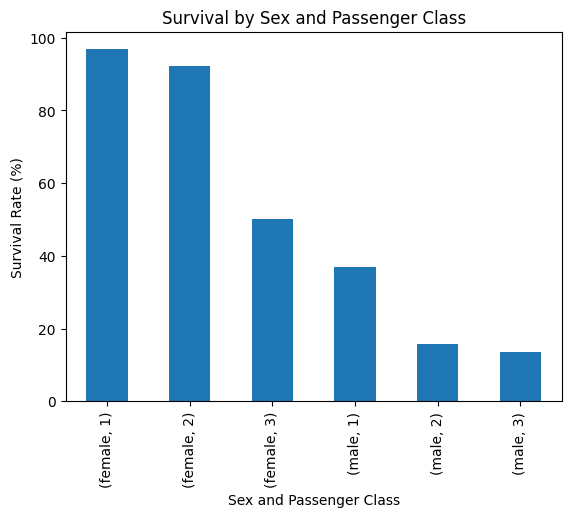

In [60]:
survival_rate_sex_class.plot(kind='bar')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Sex and Passenger Class')
plt.title('Survival by Sex and Passenger Class')
plt.show()

In [58]:
# Survival rate of People with family members vs those without
survival_rate_with_family = round(df.groupby(['Sex', 'Pclass', 'HasFamily'])['Survived'].mean() * 100, 2)
print(survival_rate_with_family)

Sex     Pclass  HasFamily
female  1       False        97.06
                True         96.67
        2       False        90.62
                True         93.18
        3       False        61.67
                True         41.67
male    1       False        33.33
                True         42.55
        2       False         9.72
                True         27.78
        3       False        12.12
                True         18.07
Name: Survived, dtype: float64


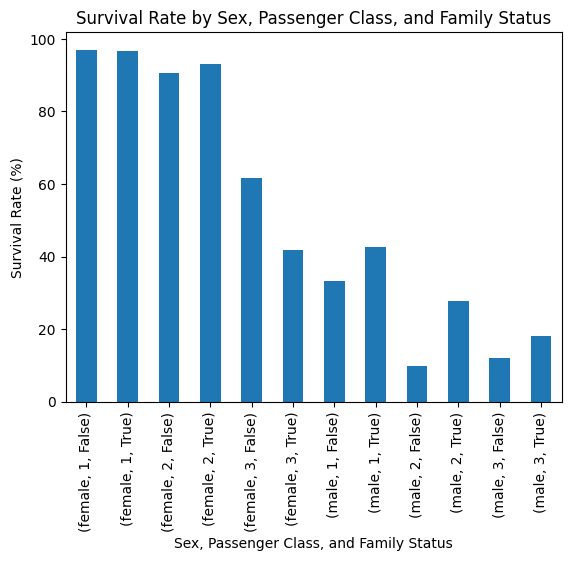

In [61]:
survival_rate_with_family.plot(kind='bar')
plt.ylabel('Survival Rate (%)')
plt.xlabel('Sex, Passenger Class, and Family Status')
plt.title('Survival Rate by Sex, Passenger Class, and Family Status')
plt.show()